# Plot pooled results from the Logistic Regression model

In [7]:
import pandas as pd
import numpy as np
import pickle

# add folder with custom functions to path
import sys
sys.path.append('../onc_functions')

#import custom plotting functions
from plot_functions import onc_calc_cm, onc_plot_roc, onc_plot_roc_no_threshold

In [12]:
with open('./results/2021_final_LR_model_test_pred_proba_pooled.pickle','rb') as f:  
    results = pickle.load(f)

results = results.loc[:,['score','died_in_90','subset','usrds_id']]
results = results.rename(columns={'died_in_90':'y'})
results.head()

,score,y,subset,usrds_id
0,0.918726,1.0,9,31089.0
1,0.784944,0.0,8,34521.0
2,0.484961,0.0,8,46751.0
3,0.629407,0.0,9,50506.0
4,0.194189,0.0,8,54985.0


# plot the ROC AUC with points at 20% and 50% thresholds

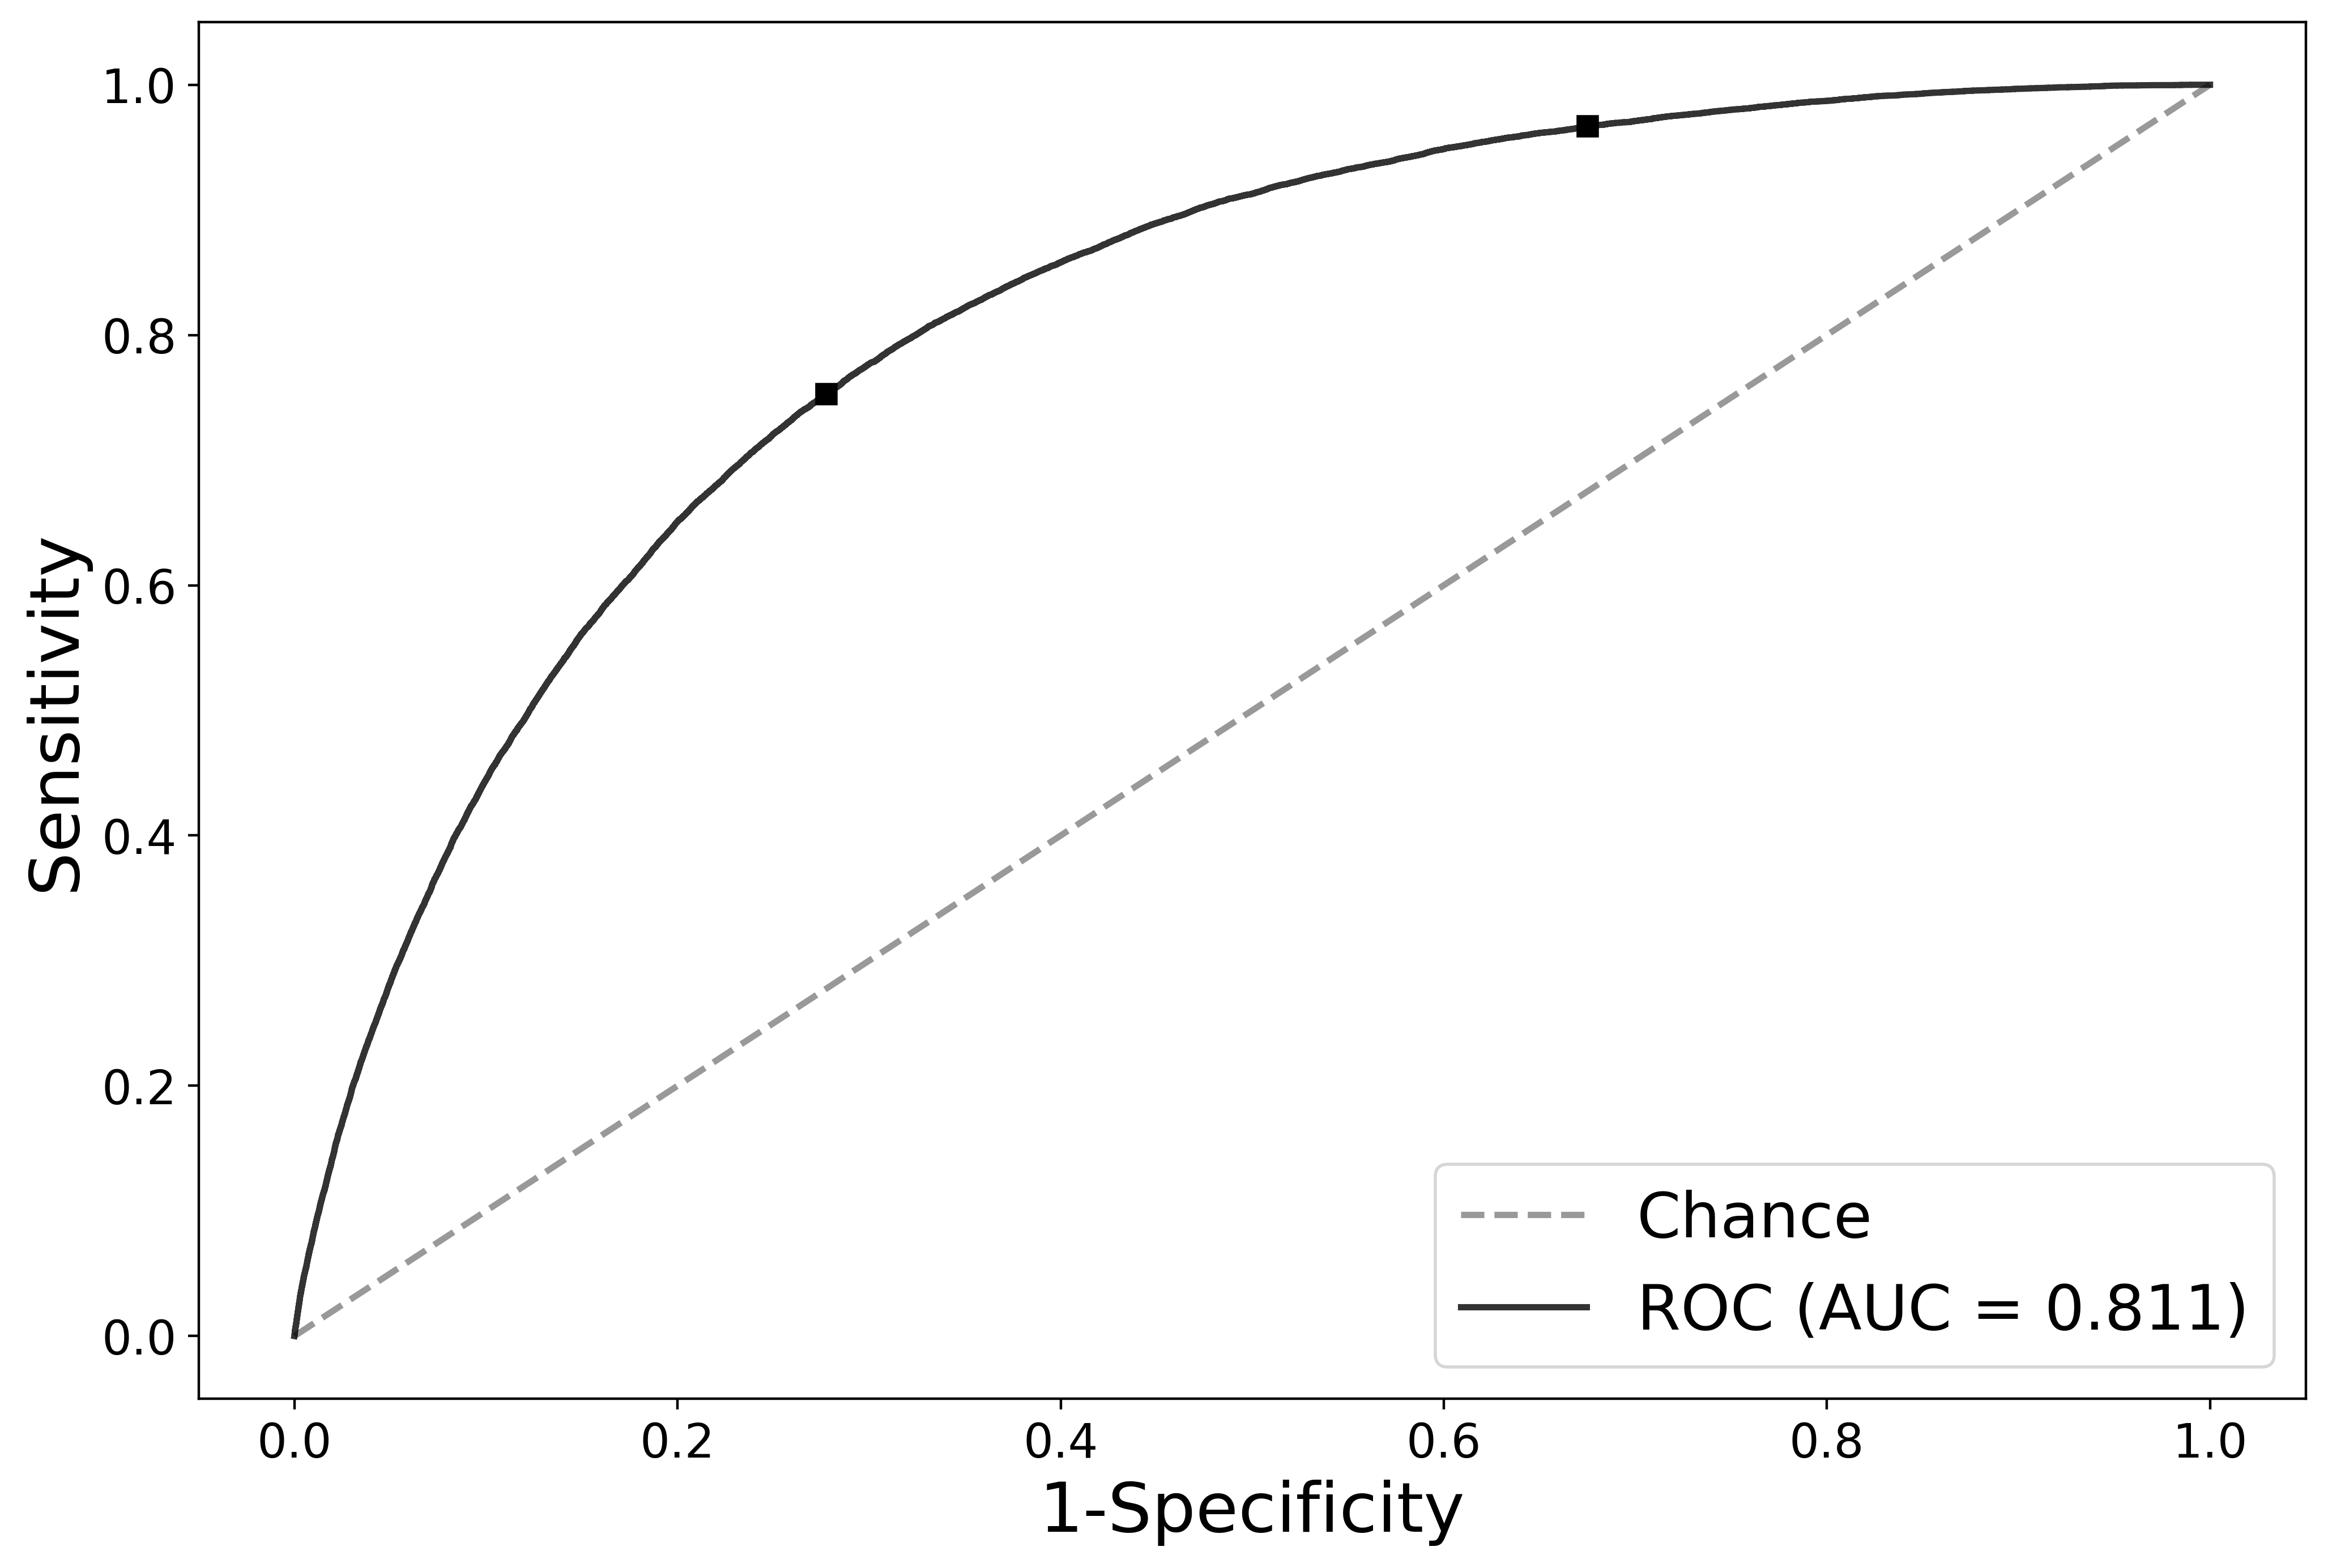

In [10]:
onc_plot_roc(
            y_true=results.y, 
            y_pred=results.score, 
            model_name='lr');

### Print the confusion matrix and performance metrics for multiple thresholds

In [13]:
cm = onc_calc_cm(
    results.y, 
    results.score, 
    range_probas=[.10,.20, .30, .40, .50])
cm

,threshold,sensitivity,specificity,likelihood_ratio_neg,likelihood_ratio_pos,tp,fp,tn,fn,total_survived,total_deceased
0.1,0.1,0.992696,0.15179,0.0481217,1.17034,25550,271060,48507,188,319567,25738
0.2,0.2,0.966781,0.324821,0.10227,1.43189,24883,215765,103802,855,319567,25738
0.3,0.3,0.921206,0.48065,0.163932,1.77377,23710,165967,153600,2028,319567,25738
0.4,0.4,0.850183,0.612116,0.244753,2.19185,21882,123955,195612,3856,319567,25738
0.5,0.5,0.752661,0.722268,0.342447,2.71003,19372,88754,230813,6366,319567,25738


In [14]:
#save 
cm.to_csv('./results/2021_lr_confusion_matrix.csv')